In [1]:
import pandas as pd

notes = pd.read_csv('NOTEEVENTS.csv.gz', compression='gzip')
notes.head()

/tmp/ipykernel_440609/1980799312.py:3: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  notes = pd.read_csv('NOTEEVENTS.csv.gz', compression='gzip')


,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [2]:
notes['TEXT'][0]

'Admission Date:  [**2151-7-16**]       Discharge Date:  [**2151-8-4**]\n\n\nService:\nADDENDUM:\n\nRADIOLOGIC STUDIES:  Radiologic studies also included a chest\nCT, which confirmed cavitary lesions in the left lung apex\nconsistent with infectious process/tuberculosis.  This also\nmoderate-sized left pleural effusion.\n\nHEAD CT:  Head CT showed no intracranial hemorrhage or mass\neffect, but old infarction consistent with past medical\nhistory.\n\nABDOMINAL CT:  Abdominal CT showed lesions of\nT10 and sacrum most likely secondary to osteoporosis. These can\nbe followed by repeat imaging as an outpatient.\n\n\n\n                            [**First Name8 (NamePattern2) **] [**First Name4 (NamePattern1) 1775**] [**Last Name (NamePattern1) **], M.D.  [**MD Number(1) 1776**]\n\nDictated By:[**Hospital 1807**]\nMEDQUIST36\n\nD:  [**2151-8-5**]  12:11\nT:  [**2151-8-5**]  12:21\nJOB#:  [**Job Number 1808**]\n'

In [ ]:
notes['CHARTTIME'] = notes['CHARTTIME'].fillna(notes['CHARTDATE'])
print(notes['CHARTTIME'].isnull().sum())
print(notes['CHARTDATE'].isnull().sum())
notes_copy = notes.copy()


notes_copy['CHARTTIME'] = pd.to_datetime(notes_copy['CHARTTIME'], format='mixed')
print(notes_copy['CHARTTIME'].astype(int).head())

notes_copy['CHARTTIME'] = (notes_copy['CHARTTIME'].astype(int) // 10**9)






0
0
0    5730393600000000000
1    4684608000000000000
2    4714416000000000000
3    4879612800000000000
4    6066144000000000000
Name: CHARTTIME, dtype: int64


In [12]:
icustays = pd.read_csv('ICUSTAYS.csv.gz', compression='gzip')
icustays.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202


In [20]:
merged = icustays.merge(notes_copy, on=['SUBJECT_ID', 'HADM_ID'], how='left')
merged.dropna(subset=['ICUSTAY_ID'], inplace=True)
print(merged['CHARTTIME'].min())
print(merged['CHARTTIME'].max())
print(merged['CHARTTIME'].isnull().sum())
merged.head()

4116061140.0
7593955200.0
398


,ROW_ID_x,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,...,LOS,ROW_ID_y,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,...,3.249,1592.0,7.199194e+09,7.199194e+09,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2198-2-11**] Discharge...
1,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,...,3.249,113818.0,7.198848e+09,7.198848e+09,NaN,ECG,Report,NaN,NaN,Sinus tachycardia\nProbable old inferior infar...
2,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,...,3.249,113819.0,7.198848e+09,7.198848e+09,NaN,ECG,Report,NaN,NaN,Probable atrial fibrillation with uncontrolled...
3,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,...,3.249,113820.0,7.198762e+09,7.198762e+09,NaN,ECG,Report,NaN,NaN,"Sinus rhythm. Inferior myocardial infarction, ..."
4,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,...,3.249,113821.0,7.198589e+09,7.198589e+09,NaN,ECG,Report,NaN,NaN,Sinus rhythm. Significant Q waves in the infer...


In [14]:
icu_notes = merged[['ICUSTAY_ID', 'CHARTTIME', 'TEXT']]
icu_notes['ICUSTAY_ID'] = icu_notes['ICUSTAY_ID'].astype(int) - 200000
icu_notes = icu_notes.sort_values(by=['ICUSTAY_ID', 'CHARTTIME'])
icu_notes[icu_notes['ICUSTAY_ID'] == 3]


/tmp/ipykernel_2570631/3829490844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icu_notes['ICUSTAY_ID'] = icu_notes['ICUSTAY_ID'].astype(int) - 200000


,ICUSTAY_ID,CHARTTIME,TEXT
1170080,3,7.244986e+09,"Narrow complex tachycardia, mechanism is uncer..."
1170078,3,7.245072e+09,PATIENT/TEST INFORMATION:\nIndication: ARDS vs...
1170092,3,7.245080e+09,[**2199-8-3**] 2:08 AM\n CHEST PORT. LINE PLAC...
1170106,3,7.245091e+09,Admission to Sicu note\nPlease see careview fo...
1170097,3,7.245101e+09,[**2199-8-3**] 8:03 AM\n CT ABD W&W/O C; CT PE...
1170100,3,7.245124e+09,NPN (SEE CAREVUE FOR SPECIFICS)\n\n[**Name (NI...
1170087,3,7.245128e+09,[**2199-8-3**] 3:26 PM\n PTC ...
1170101,3,7.245138e+09,"ADDENDUM:\nPT TO IR FOR DRAIN PLACEMENT, INTUB..."
1170102,3,7.245140e+09,Resp. care note - Intubated pt. transffered fr...
1170093,3,7.245145e+09,[**2199-8-3**] 8:10 PM\n CHEST (PORTABLE AP); ...


In [15]:
import re

icu_notes_copy = icu_notes.copy()

def extract_datetime_from_text(text):
    if not isinstance(text, str):
        return None

    match = re.search(r'\[\*\*(\d{4}-\d{1,2}-\d{1,2})\*\*\]\s*([\d:]+\s*[APMapm]{2})?', text)
    if match:
        date = match.group(1)  # 提取日期
        time = match.group(2) or "00:00 AM" 
        time = re.sub(r'(\d{1,2})(\d{2})([AaPp][Mm])', r'\1:\2\3', time)
        #date = re.sub(r'(\d{4})-(\d{1,2})-(\d{1,2})', lambda m: f"{m.group(1)}-{int(m.group(2)):02d}-{int(m.group(3)):02d}", date)

        datetime_str = f"{date} {time}".strip()
        try:
            if datetime_str.endswith('AM') or datetime_str.endswith('PM'):
                return str(pd.to_datetime(datetime_str, format='mixed', errors='coerce').timestamp())
            else:
                return str(pd.to_datetime(f"{date} 00:00 AM".strip(), format='mixed', errors='coerce').timestamp())

        except Exception as e:
            print(f"Error parsing datetime: {e}, input: {datetime_str}")
            return None
    return None

icu_notes_copy['EXTRACTED_CHARTTIME'] = icu_notes_copy['TEXT'].apply(extract_datetime_from_text)

icu_notes_copy['CHARTTIME'] = icu_notes_copy.apply(
    lambda row: row['EXTRACTED_CHARTTIME'] if pd.notna(row['EXTRACTED_CHARTTIME']) else row['CHARTTIME'],
    axis=1
)

print(icu_notes_copy.head())


Error parsing datetime: NaTType does not support timestamp, input: 2406-6-22 00:00 AM
Error parsing datetime: NaTType does not support timestamp, input: 1105-9-28 00:00 AM
Error parsing datetime: NaTType does not support timestamp, input: 1105-9-28 00:00 AM
Error parsing datetime: NaTType does not support timestamp, input: 1385-9-27 00:00 AM
Error parsing datetime: NaTType does not support timestamp, input: 1508-11-16 00:00 AM
Error parsing datetime: NaTType does not support timestamp, input: 1603-9-2 00:00 AM
Error parsing datetime: NaTType does not support timestamp, input: 1447-9-15 00:00 AM
Error parsing datetime: NaTType does not support timestamp, input: 1173-8-17 00:00 AM
Error parsing datetime: NaTType does not support timestamp, input: 1173-8-17 00:00 AM
Error parsing datetime: NaTType does not support timestamp, input: 1173-8-17 00:00 AM
Error parsing datetime: NaTType does not support timestamp, input: 1173-8-17 00:00 AM
Error parsing datetime: NaTType does not support times

In [16]:
icu_notes_copy.rename(columns={'ICUSTAY_ID': 'icustayid', 'CHARTTIME': 'charttime', 'TEXT': 'notes'}, inplace=True)
icu_notes_copy.to_csv('icu_notes.csv', index=False)

In [19]:
icu_notes['CHARTTIME'].isnull().sum()

np.int64(398)

In [27]:
import pandas as pd
icu_notes_copy = pd.read_csv('icu_notes.csv')
icu_notes_copy.head()

,icustayid,charttime,notes,EXTRACTED_CHARTTIME
0,1,6.685200e+09,Normal sinus rhythm with left bundle-branch bl...,6.685200e+09
1,1,6.686367e+09,[**2181-11-18**] 12:13 PM\n BILAT LOWER EXT VE...,6.686367e+09
2,1,6.686323e+09,Sinus rhythm. Marked left axis deviation. Le...,6.686323e+09
3,1,6.686860e+09,[**2181-11-24**] 5:07 AM\n CHEST (PORTABLE AP)...,6.686860e+09
4,1,6.686496e+09,Sinus tachycardia. Left atrial abnormality. Le...,6.686496e+09


In [28]:
sepsis = pd.read_csv('../../../py_ai_clinician/mimictable.csv')
sepsis.columns

Index(['bloc', 'icustayid', 'charttime', 'gender', 'age', 'elixhauser',
       're_admission', 'died_in_hosp', 'died_within_48h_of_out_time',
       'mortality_90d', 'delay_end_of_record_and_discharge_or_death',
       'Weight_kg', 'GCS', 'HR', 'SysBP', 'MeanBP', 'DiaBP', 'RR', 'SpO2',
       'Temp_C', 'FiO2_1', 'Potassium', 'Sodium', 'Chloride', 'Glucose', 'BUN',
       'Creatinine', 'Magnesium', 'Calcium', 'Ionised_Ca', 'CO2_mEqL', 'SGOT',
       'SGPT', 'Total_bili', 'Albumin', 'Hb', 'WBC_count', 'Platelets_count',
       'PTT', 'PT', 'INR', 'Arterial_pH', 'paO2', 'paCO2', 'Arterial_BE',
       'Arterial_lactate', 'HCO3', 'mechvent', 'Shock_Index', 'PaO2_FiO2',
       'median_dose_vaso', 'max_dose_vaso', 'input_total', 'input_4hourly',
       'output_total', 'output_4hourly', 'cumulated_balance', 'SOFA', 'SIRS'],
      dtype='object')

In [29]:
icu_notes_copy['notes'].iloc[4]

'Sinus tachycardia. Left atrial abnormality. Left bundle-branch block. Compared\nto the previous tracing of [**2181-11-20**] the heart rate is increased. Otherwise, no\ndiagnostic change.\n\n'

In [30]:
common_ids = set(icu_notes_copy['icustayid']).intersection(set(sepsis['icustayid']))

icu_notes_copy = icu_notes_copy[icu_notes_copy['icustayid'].isin(common_ids)]
sepsis = sepsis[sepsis['icustayid'].isin(common_ids)]

#print(icu_notes_copy.shape)
#print(sepsis.shape)

merged = pd.merge(icu_notes_copy, sepsis, on='icustayid', suffixes=('_note', '_mimic'))
#print(merged['charttime_mimic'].isnull().sum())
#print(merged['charttime_note'].isnull().sum())
merged['charttime_note'] = merged['charttime_note'].fillna(method='bfill')

merged['time_diff'] = (merged['charttime_mimic'].astype(float) - merged['charttime_note'].astype(float)).abs()
print(merged.columns)

nearest_notes = merged.loc[merged.groupby(['icustayid', 'charttime_mimic'])['time_diff'].idxmin()]

grouped_notes = nearest_notes.groupby(['icustayid', 'charttime_mimic'])['notes'].apply(lambda x: '; '.join(x.astype(str))).reset_index()
grouped_notes.rename(columns={'charttime_mimic': 'charttime'}, inplace=True)

mimic_table = pd.merge(sepsis, grouped_notes, how='left', on=['icustayid', 'charttime'])

mimic_table.head()


/tmp/ipykernel_3182816/3707120067.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged['charttime_note'] = merged['charttime_note'].fillna(method='bfill')


Index(['icustayid', 'charttime_note', 'notes', 'EXTRACTED_CHARTTIME', 'bloc',
       'charttime_mimic', 'gender', 'age', 'elixhauser', 're_admission',
       'died_in_hosp', 'died_within_48h_of_out_time', 'mortality_90d',
       'delay_end_of_record_and_discharge_or_death', 'Weight_kg', 'GCS', 'HR',
       'SysBP', 'MeanBP', 'DiaBP', 'RR', 'SpO2', 'Temp_C', 'FiO2_1',
       'Potassium', 'Sodium', 'Chloride', 'Glucose', 'BUN', 'Creatinine',
       'Magnesium', 'Calcium', 'Ionised_Ca', 'CO2_mEqL', 'SGOT', 'SGPT',
       'Total_bili', 'Albumin', 'Hb', 'WBC_count', 'Platelets_count', 'PTT',
       'PT', 'INR', 'Arterial_pH', 'paO2', 'paCO2', 'Arterial_BE',
       'Arterial_lactate', 'HCO3', 'mechvent', 'Shock_Index', 'PaO2_FiO2',
       'median_dose_vaso', 'max_dose_vaso', 'input_total', 'input_4hourly',
       'output_total', 'output_4hourly', 'cumulated_balance', 'SOFA', 'SIRS',
       'time_diff'],
      dtype='object')


,bloc,icustayid,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,mortality_90d,...,median_dose_vaso,max_dose_vaso,input_total,input_4hourly,output_total,output_4hourly,cumulated_balance,SOFA,SIRS,notes
0,1.0,3.0,7.245486e+09,0.0,17639.826435,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,3329289.5,500.0,13617.0,520.0,3315672.5,6,2,Nursing progress note\nSee Carevue for objecti...
1,2.0,3.0,7.245500e+09,0.0,17639.826435,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,3329789.5,500.0,13982.0,365.0,3315807.5,6,2,Nursing progress note\nSee Carevue for objecti...
2,3.0,3.0,7.245515e+09,0.0,17639.826435,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,3330289.5,500.0,14262.0,280.0,3316027.5,6,2,NURSING PROGRESS NOTE\n\nPLEASE SEE CAREVUE FO...
3,4.0,3.0,7.245529e+09,0.0,17639.826435,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,3330789.5,500.0,14602.0,340.0,3316187.5,6,1,NURSING PROGRESS NOTE\n\nPLEASE SEE CAREVUE FO...
4,5.0,3.0,7.245544e+09,0.0,17639.826435,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,3331289.5,500.0,15142.0,540.0,3316147.5,6,2,NURSING PROGRESS NOTE\n\nPLEASE SEE CAREVUE FO...


In [31]:
mimic_table.sort_values(by=['icustayid', 'charttime'], inplace=True)

In [32]:
mimic_table.columns

Index(['bloc', 'icustayid', 'charttime', 'gender', 'age', 'elixhauser',
       're_admission', 'died_in_hosp', 'died_within_48h_of_out_time',
       'mortality_90d', 'delay_end_of_record_and_discharge_or_death',
       'Weight_kg', 'GCS', 'HR', 'SysBP', 'MeanBP', 'DiaBP', 'RR', 'SpO2',
       'Temp_C', 'FiO2_1', 'Potassium', 'Sodium', 'Chloride', 'Glucose', 'BUN',
       'Creatinine', 'Magnesium', 'Calcium', 'Ionised_Ca', 'CO2_mEqL', 'SGOT',
       'SGPT', 'Total_bili', 'Albumin', 'Hb', 'WBC_count', 'Platelets_count',
       'PTT', 'PT', 'INR', 'Arterial_pH', 'paO2', 'paCO2', 'Arterial_BE',
       'Arterial_lactate', 'HCO3', 'mechvent', 'Shock_Index', 'PaO2_FiO2',
       'median_dose_vaso', 'max_dose_vaso', 'input_total', 'input_4hourly',
       'output_total', 'output_4hourly', 'cumulated_balance', 'SOFA', 'SIRS',
       'notes'],
      dtype='object')

In [33]:
print(len(mimic_table[mimic_table['input_4hourly'] > 100000]))
mimic_table.loc[mimic_table['input_4hourly'] >= 100000, 'input_4hourly'] = 100000
print(len(mimic_table[mimic_table['output_4hourly'] > 10000]))
mimic_table.loc[mimic_table['output_4hourly'] >= 10000, 'output_4hourly'] = 10000
#print(len(mimic_table[mimic_table['input_4hourly'] > 10000]))
#mimic_table = mimic_table[mimic_table['input_4hourly'] <= 10000]
print(len(mimic_table[mimic_table['max_dose_vaso'] > 1]))
mimic_table.loc[mimic_table['max_dose_vaso'] >= 1, 'max_dose_vaso'] = 1


816
1
168


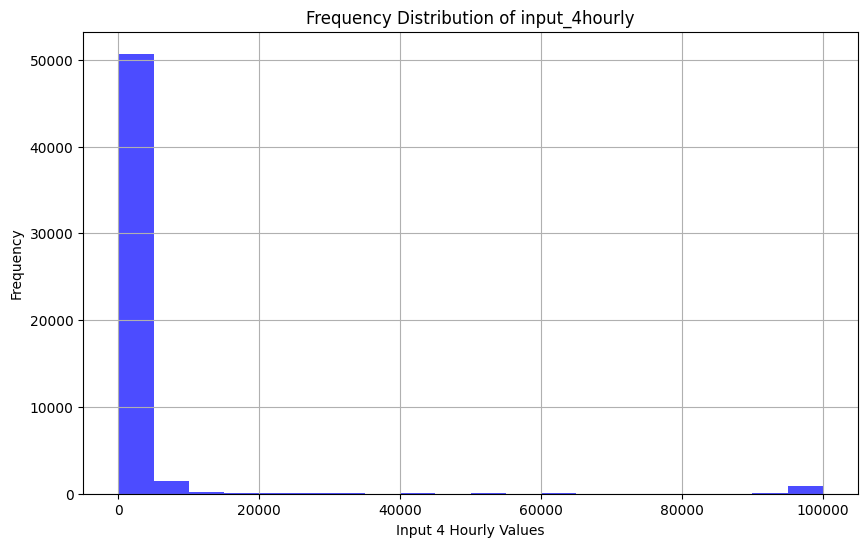

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

if mimic_table['input_4hourly'].isnull().any():
    print("Missing data found. Consider handling it before plotting.")
    # You might want to fill or drop NaNs depending on your context
    mimic_table['input_4hourly'].fillna(mimic_table['input_4hourly'].mean(), inplace=True)  # Example: fill with mean

# Plotting the frequency distribution of 'input_4hourly'
plt.figure(figsize=(10, 6))  # Optional: Adjusts the size of the plot
plt.hist(mimic_table['input_4hourly'].dropna(), bins=20, color='blue', alpha=0.7)  # 'bins' controls the number of bins
plt.title('Frequency Distribution of input_4hourly')
plt.xlabel('Input 4 Hourly Values')
plt.ylabel('Frequency')
plt.grid(True)  # Optional: Adds a grid for easier visualization
plt.show()

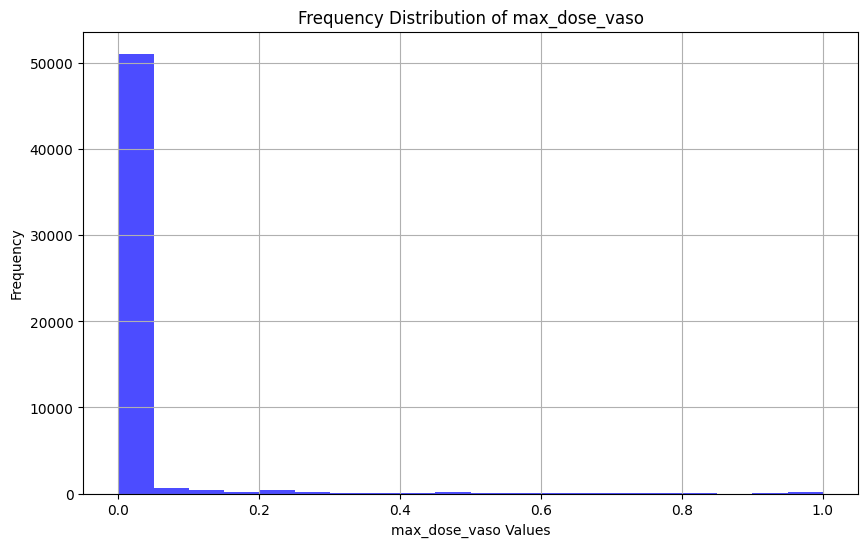

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

if mimic_table['max_dose_vaso'].isnull().any():
    print("Missing data found. Consider handling it before plotting.")
    # You might want to fill or drop NaNs depending on your context
    mimic_table['max_dose_vaso'].fillna(mimic_table['max_dose_vaso'].mean(), inplace=True)  # Example: fill with mean

# Plotting the frequency distribution of 'max_dose_vaso'
plt.figure(figsize=(10, 6))  # Optional: Adjusts the size of the plot
plt.hist(mimic_table['max_dose_vaso'].dropna(), bins=20, color='blue', alpha=0.7)  # 'bins' controls the number of bins
plt.title('Frequency Distribution of max_dose_vaso')
plt.xlabel('max_dose_vaso Values')
plt.ylabel('Frequency')
plt.grid(True)  # Optional: Adds a grid for easier visualization
plt.show()

In [34]:
from sklearn.impute import KNNImputer
import numpy as np

def anomaly_proc(mimic, anomaly_columns):
    mimic_table = mimic.copy()
    for col in anomaly_columns:
        if mimic_table[col].dtype == 'float64':
            q1 = mimic_table[col].quantile(0.25)
            q3 = mimic_table[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 5 * iqr
            upper_bound = q3 + 5 * iqr
            print(f"Column: {col}, Lower bound: {lower_bound}, Upper bound: {upper_bound}")
            print(f"Low outliers: {len(mimic_table[(mimic_table[col] < lower_bound)])}")
            print(f"High outliers: {len(mimic_table[(mimic_table[col] > upper_bound)])}")
            mimic_table.loc[mimic_table[col] < lower_bound, col] = np.nan
            mimic_table.loc[mimic_table[col] > upper_bound, col] = np.nan
    
    imputer = KNNImputer(n_neighbors=5)
    mimic_table[anomaly_columns] = imputer.fit_transform(mimic_table[anomaly_columns])

    return mimic_table

anomaly_columns = ['Temp_C', 'SGOT', 'SGPT', 'Total_bili', 'Creatinine', 'WBC_count', 'PT', 'INR', 'input_total','output_total']
mimic_table=anomaly_proc(mimic_table, anomaly_columns)


Column: Temp_C, Lower bound: 31.9285663423085, Upper bound: 41.71508546859488
Low outliers: 17
High outliers: 0
Column: SGOT, Lower bound: -183.69230769230768, Upper bound: 268.5769230769231
Low outliers: 0
High outliers: 2601
Column: SGPT, Lower bound: -182.57142857142858, Upper bound: 256.09285714285716
Low outliers: 0
High outliers: 2955
Column: Total_bili, Lower bound: -3.3850000000000007, Upper bound: 4.942
Low outliers: 0
High outliers: 3234
Column: Creatinine, Lower bound: -4.299999999999999, Upper bound: 6.699999999999999
Low outliers: 0
High outliers: 1741
Column: WBC_count, Lower bound: -26.799999999999812, Upper bound: 49.099999999999845
Low outliers: 0
High outliers: 145
Column: PT, Lower bound: -1.5999999999999996, Upper bound: 30.300000000000004
Low outliers: 0
High outliers: 1923
Column: INR, Lower bound: -0.8999999999999995, Upper bound: 3.4999999999999996
Low outliers: 0
High outliers: 1691
Column: input_total, Lower bound: -1788149.965, Upper bound: 2146439.958
Low ou

In [35]:
def calculate_cumulative_totals(df):
    # 初始化累积列
    df['calculated_input_total'] = 0
    df['calculated_output_total'] = 0
    
    # 遍历每个ICU停留
    for icustay in df['icustayid'].unique():
        mask = df['icustayid'] == icustay
        # 使用首个有效值初始化
        df.loc[mask, 'calculated_input_total'] = df.loc[mask, 'input_total'].iloc[0]
        df.loc[mask, 'calculated_output_total'] = df.loc[mask, 'output_total'].iloc[0]
        
        # 累加每4小时的变化
        df.loc[mask, 'calculated_input_total'] = df.loc[mask, 'calculated_input_total'].cumsum() + df.loc[mask, 'input_4hourly'].cumsum() - df.loc[mask, 'input_4hourly'].iloc[0]
        df.loc[mask, 'calculated_output_total'] = df.loc[mask, 'calculated_output_total'].cumsum() + df.loc[mask, 'output_4hourly'].cumsum() - df.loc[mask, 'output_4hourly'].iloc[0]

    df['input_total'] = df['calculated_input_total']
    df['output_total'] = df['calculated_output_total']
    df.drop(columns=['calculated_input_total', 'calculated_output_total'], inplace=True)
    return df

minic_table = calculate_cumulative_totals(mimic_table)
mimic_table['cumulated_balance'] = mimic_table['input_total'] - mimic_table['output_total']

/tmp/ipykernel_3182816/88980864.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '652185.248' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[mask, 'calculated_input_total'] = df.loc[mask, 'input_total'].iloc[0]
/tmp/ipykernel_3182816/88980864.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '13349.6' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[mask, 'calculated_output_total'] = df.loc[mask, 'output_total'].iloc[0]


In [36]:
def label_medication(data):
    data['vaso_bin'] = 0
    mask_vaso = data['max_dose_vaso'] > 0
    data.loc[mask_vaso, 'vaso_bin'] = pd.qcut(data.loc[mask_vaso, 'max_dose_vaso'], 4, labels=False, duplicates='drop') + 1
    #data.loc[mask_vaso, 'vaso_bin'] = 1
    data['input_bin'] = 0
    mask_input = data['input_4hourly'] > 0
    data.loc[mask_input, 'input_bin'] = pd.qcut(data.loc[mask_input, 'input_4hourly'], 4, labels=False, duplicates='drop') + 1
    #data.loc[mask_input, 'input_bin'] = 1
    print(data['vaso_bin'].value_counts())
    #input_bins = np.linspace(data['input_4hourly'].min(), data['input_4hourly'].max(), 6)
    #data['input_bin'] = pd.cut(data['input_4hourly'], bins=input_bins, labels=False, include_lowest=True)
    print(data['input_bin'].value_counts())

    
    # 创建25维的向量标签
    data['medication'] = data['vaso_bin'] * 5 + data['input_bin']
    #data['medication'] = data['medication'].apply(lambda x: np.eye(25)[x])  # 转换为one-hot编码

    # 移除原始标签列
    data.drop(['vaso_bin', 'input_bin'], axis=1, inplace=True)

    return data

mimic_table = label_medication(mimic_table)

mimic_table.head()

vaso_bin
0    50248
1     1056
4      860
3      857
2      678
Name: count, dtype: int64
input_bin
0    27473
2     7314
1     7043
4     6557
3     5312
Name: count, dtype: int64


,bloc,icustayid,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,mortality_90d,...,max_dose_vaso,input_total,input_4hourly,output_total,output_4hourly,cumulated_balance,SOFA,SIRS,notes,medication
0,1.0,3.0,7.245486e+09,0.0,17639.826435,0.0,0.0,0.0,0.0,1.0,...,0.0,652185.248,500.0,13617.0,520.0,638568.248,6,2,Nursing progress note\nSee Carevue for objecti...,2
1,2.0,3.0,7.245500e+09,0.0,17639.826435,0.0,0.0,0.0,0.0,1.0,...,0.0,1304870.496,500.0,27599.0,365.0,1277271.496,6,2,Nursing progress note\nSee Carevue for objecti...,2
2,3.0,3.0,7.245515e+09,0.0,17639.826435,0.0,0.0,0.0,0.0,1.0,...,0.0,1957555.744,500.0,41496.0,280.0,1916059.744,6,2,NURSING PROGRESS NOTE\n\nPLEASE SEE CAREVUE FO...,2
3,4.0,3.0,7.245529e+09,0.0,17639.826435,0.0,0.0,0.0,0.0,1.0,...,0.0,2610240.992,500.0,55453.0,340.0,2554787.992,6,1,NURSING PROGRESS NOTE\n\nPLEASE SEE CAREVUE FO...,2
4,5.0,3.0,7.245544e+09,0.0,17639.826435,0.0,0.0,0.0,0.0,1.0,...,0.0,3262926.240,500.0,69610.0,540.0,3193316.240,6,2,NURSING PROGRESS NOTE\n\nPLEASE SEE CAREVUE FO...,2


In [37]:
mimic_table['died_in_hosp'].value_counts()
#mimic_table['delay_end_of_record_and_discharge_or_death'].value_counts()

died_in_hosp
0.0    47172
1.0     6527
Name: count, dtype: int64

In [38]:
#process 1

import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from scipy.stats import zscore


def preprocess_data(data):
    data = data.copy()
    data.drop(['died_within_48h_of_out_time', 'mortality_90d', 'delay_end_of_record_and_discharge_or_death'], axis=1, inplace=True)

    notes = data[['icustayid', 'charttime', 'notes']]
    data.drop(['notes'], axis=1, inplace=True)
    colbin = ['gender','mechvent','max_dose_vaso','re_admission'] 
    colnorm= ['age','Weight_kg','GCS','HR','SysBP','MeanBP','DiaBP','RR','Temp_C','FiO2_1',\
       'Potassium','Sodium','Chloride','Glucose','Magnesium','Calcium',\
       'Hb','WBC_count','Platelets_count','PTT','PT','Arterial_pH','paO2','paCO2',\
       'Arterial_BE','HCO3','Arterial_lactate','SOFA','SIRS','Shock_Index','PaO2_FiO2','cumulated_balance'] 
    collog=['SpO2','BUN','Creatinine','SGOT','SGPT','Total_bili','INR','input_total','input_4hourly','output_total','output_4hourly']

    colbin=np.where(np.isin(data.columns,colbin))[0]
    colnorm=np.where(np.isin(data.columns,colnorm))[0]
    collog=np.where(np.isin(data.columns,collog))[0]

    data.iloc[:,colbin]=data.iloc[:,colbin] - 0.5
    data.iloc[:,colnorm]=zscore(data.iloc[:,colnorm], ddof=1)
    data.iloc[:,collog]=zscore(np.log(0.1+data.iloc[:,collog]), ddof=1)
    data['max_dose_vaso'] = np.log(0.6+data['max_dose_vaso'])
    data['input_4hourly'] = 2*data['input_4hourly']

    return data, notes

mimic_table, notes = preprocess_data(mimic_table)
#data = pd.merge(data, notes, on=['icustayid', 'charttime'], how='left')

mimic_table.head()



,bloc,icustayid,charttime,gender,age,elixhauser,re_admission,died_in_hosp,Weight_kg,GCS,...,median_dose_vaso,max_dose_vaso,input_total,input_4hourly,output_total,output_4hourly,cumulated_balance,SOFA,SIRS,medication
0,1.0,3.0,7.245486e+09,-0.5,-1.100725,0.0,-0.5,0.0,-0.204430,0.65547,...,0.0,-2.302585,0.794146,1.893313,0.557322,0.813209,-0.280802,-0.06908,0.440527,2
1,2.0,3.0,7.245500e+09,-0.5,-1.100725,0.0,-0.5,0.0,-0.204430,0.65547,...,0.0,-2.302585,0.903372,1.893313,0.707658,0.718301,-0.160635,-0.06908,0.440527,2
2,3.0,3.0,7.245515e+09,-0.5,-1.100725,0.0,-0.5,0.0,-0.204430,0.65547,...,0.0,-2.302585,0.967250,1.893313,0.794443,0.647217,-0.040452,-0.06908,0.440527,2
3,4.0,3.0,7.245529e+09,-0.5,-1.100725,0.0,-0.5,0.0,-0.175297,0.65547,...,0.0,-2.302585,1.012568,1.893313,0.856142,0.699276,0.079719,-0.06908,-0.530089,2
4,5.0,3.0,7.245544e+09,-0.5,-1.100725,0.0,-0.5,0.0,-0.168014,0.65547,...,0.0,-2.302585,1.047718,1.893313,0.904528,0.823329,0.199853,-0.06908,0.440527,2


In [39]:
mimic_table.columns

Index(['bloc', 'icustayid', 'charttime', 'gender', 'age', 'elixhauser',
       're_admission', 'died_in_hosp', 'Weight_kg', 'GCS', 'HR', 'SysBP',
       'MeanBP', 'DiaBP', 'RR', 'SpO2', 'Temp_C', 'FiO2_1', 'Potassium',
       'Sodium', 'Chloride', 'Glucose', 'BUN', 'Creatinine', 'Magnesium',
       'Calcium', 'Ionised_Ca', 'CO2_mEqL', 'SGOT', 'SGPT', 'Total_bili',
       'Albumin', 'Hb', 'WBC_count', 'Platelets_count', 'PTT', 'PT', 'INR',
       'Arterial_pH', 'paO2', 'paCO2', 'Arterial_BE', 'Arterial_lactate',
       'HCO3', 'mechvent', 'Shock_Index', 'PaO2_FiO2', 'median_dose_vaso',
       'max_dose_vaso', 'input_total', 'input_4hourly', 'output_total',
       'output_4hourly', 'cumulated_balance', 'SOFA', 'SIRS', 'medication'],
      dtype='object')

In [40]:
import numpy as np
from scipy.stats import zscore

#process 2
useless_index = ['icustayid', 'charttime']
demo_index = ['gender', 'age', 're_admission', 'Weight_kg']
prev_med_index = ['median_dose_vaso', 'max_dose_vaso', 'input_total', 'input_4hourly']
label = ['medication']
death_signal = ['died_in_hosp']
vitals_index = list(set(mimic_table.columns) - set(useless_index + demo_index + prev_med_index + label + death_signal))

mimic_table = mimic_table[useless_index + demo_index + prev_med_index + vitals_index + label + death_signal]

mimic_table.head()

,icustayid,charttime,gender,age,re_admission,Weight_kg,median_dose_vaso,max_dose_vaso,input_total,input_4hourly,...,SysBP,SGOT,output_4hourly,Arterial_lactate,SIRS,Sodium,Platelets_count,Glucose,medication,died_in_hosp
0,3.0,7.245486e+09,-0.5,-1.100725,-0.5,-0.204430,0.0,-2.302585,0.794146,1.893313,...,-0.907071,0.039016,0.813209,-0.869435,0.440527,0.886065,-0.983120,-0.691414,2,0.0
1,3.0,7.245500e+09,-0.5,-1.100725,-0.5,-0.204430,0.0,-2.302585,0.903372,1.893313,...,-0.951677,0.063388,0.718301,-0.869435,0.440527,1.059278,-1.009716,-1.151079,2,0.0
2,3.0,7.245515e+09,-0.5,-1.100725,-0.5,-0.204430,0.0,-2.302585,0.967250,1.893313,...,-0.588800,0.063388,0.647217,-0.869435,0.440527,1.059278,-1.009716,-1.151079,2,0.0
3,3.0,7.245529e+09,-0.5,-1.100725,-0.5,-0.175297,0.0,-2.302585,1.012568,1.893313,...,-0.264743,0.063388,0.699276,-0.869435,-0.530089,1.059278,-1.009716,-0.900353,2,0.0
4,3.0,7.245544e+09,-0.5,-1.100725,-0.5,-0.168014,0.0,-2.302585,1.047718,1.893313,...,-0.426772,0.063388,0.823329,-0.869435,0.440527,1.059278,-1.009716,-0.505269,2,0.0


In [15]:
from sentence_transformers import SentenceTransformer
import torch

notes_copy = notes
sentence_bert = SentenceTransformer("/data/share_weight/all-MiniLM-L6-v2", device='cuda')
texts = notes_copy['notes'].tolist()

with torch.no_grad():
    embeddings = sentence_bert.encode(texts)
notes_copy['embeddings'] = embeddings.tolist()
notes_copy.head()

/data/kaizhang/miniconda3/envs/llm4rec/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,icustayid,charttime,notes,embeddings
0,3.0,7.245486e+09,Nursing progress note\nSee Carevue for objecti...,"[-0.04713112488389015, -0.07607615739107132, -..."
1,3.0,7.245500e+09,Nursing progress note\nSee Carevue for objecti...,"[-0.04713112488389015, -0.07607615739107132, -..."
2,3.0,7.245515e+09,NURSING PROGRESS NOTE\n\nPLEASE SEE CAREVUE FO...,"[-0.02990029752254486, -0.06559325754642487, -..."
3,3.0,7.245529e+09,NURSING PROGRESS NOTE\n\nPLEASE SEE CAREVUE FO...,"[-0.02990029752254486, -0.06559325754642487, -..."
4,3.0,7.245544e+09,NURSING PROGRESS NOTE\n\nPLEASE SEE CAREVUE FO...,"[-0.02990029752254486, -0.06559325754642487, -..."


In [41]:
import pandas as pd
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.decomposition import PCA

notes_copy = notes  # 确保notes是已经加载的DataFrame

tokenizer = AutoTokenizer.from_pretrained("/data/share_weight/models--emilyalsentzer--Bio_ClinicalBERT")
model = AutoModel.from_pretrained("/data/share_weight/models--emilyalsentzer--Bio_ClinicalBERT")
model.to("cuda:1")
model.eval()

pca = PCA(n_components=200)

def get_embeddings(texts, batch_size=32):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        inputs = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True, max_length=512).to("cuda:1")
        with torch.no_grad():
            outputs = model(**inputs)
        batch_embeddings = outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()
        embeddings.append(batch_embeddings)
    return np.vstack(embeddings)

all_embeddings = get_embeddings(list(notes_copy['notes']))

#all_embeddings = pca.fit_transform(all_embeddings)

notes_copy['embeddings'] = list(all_embeddings)
print(notes_copy.head())


   icustayid     charttime                                              notes  \
0        3.0  7.245486e+09  Nursing progress note\nSee Carevue for objecti...   
1        3.0  7.245500e+09  Nursing progress note\nSee Carevue for objecti...   
2        3.0  7.245515e+09  NURSING PROGRESS NOTE\n\nPLEASE SEE CAREVUE FO...   
3        3.0  7.245529e+09  NURSING PROGRESS NOTE\n\nPLEASE SEE CAREVUE FO...   
4        3.0  7.245544e+09  NURSING PROGRESS NOTE\n\nPLEASE SEE CAREVUE FO...   

                                          embeddings  
0  [0.10070914, 0.15996188, -0.27836522, 0.486294...  
1  [0.10070914, 0.15996188, -0.27836522, 0.486294...  
2  [0.08877277, 0.19259883, -0.24898253, 0.402557...  
3  [0.08877277, 0.19259883, -0.24898253, 0.402557...  
4  [0.08877277, 0.19259883, -0.24898253, 0.402557...  


In [42]:
mimic_table = pd.merge(mimic_table, notes_copy, on=['icustayid', 'charttime'], how='left')
mimic_table.drop(['notes'], axis=1, inplace=True)
mimic_table.head()


,icustayid,charttime,gender,age,re_admission,Weight_kg,median_dose_vaso,max_dose_vaso,input_total,input_4hourly,...,SGOT,output_4hourly,Arterial_lactate,SIRS,Sodium,Platelets_count,Glucose,medication,died_in_hosp,embeddings
0,3.0,7.245486e+09,-0.5,-1.100725,-0.5,-0.204430,0.0,-2.302585,0.794146,1.893313,...,0.039016,0.813209,-0.869435,0.440527,0.886065,-0.983120,-0.691414,2,0.0,"[0.10070914, 0.15996188, -0.27836522, 0.486294..."
1,3.0,7.245500e+09,-0.5,-1.100725,-0.5,-0.204430,0.0,-2.302585,0.903372,1.893313,...,0.063388,0.718301,-0.869435,0.440527,1.059278,-1.009716,-1.151079,2,0.0,"[0.10070914, 0.15996188, -0.27836522, 0.486294..."
2,3.0,7.245515e+09,-0.5,-1.100725,-0.5,-0.204430,0.0,-2.302585,0.967250,1.893313,...,0.063388,0.647217,-0.869435,0.440527,1.059278,-1.009716,-1.151079,2,0.0,"[0.08877277, 0.19259883, -0.24898253, 0.402557..."
3,3.0,7.245529e+09,-0.5,-1.100725,-0.5,-0.175297,0.0,-2.302585,1.012568,1.893313,...,0.063388,0.699276,-0.869435,-0.530089,1.059278,-1.009716,-0.900353,2,0.0,"[0.08877277, 0.19259883, -0.24898253, 0.402557..."
4,3.0,7.245544e+09,-0.5,-1.100725,-0.5,-0.168014,0.0,-2.302585,1.047718,1.893313,...,0.063388,0.823329,-0.869435,0.440527,1.059278,-1.009716,-0.505269,2,0.0,"[0.08877277, 0.19259883, -0.24898253, 0.402557..."


medication
0     26607
2      6756
1      6493
4      5659
3      4733
5       319
24      283
19      224
20      209
9       207
7       201
15      193
14      184
8       177
18      164
6       152
16      152
10      145
21      141
13      128
17      124
22      117
12      116
23      110
11      105
Name: count, dtype: int64


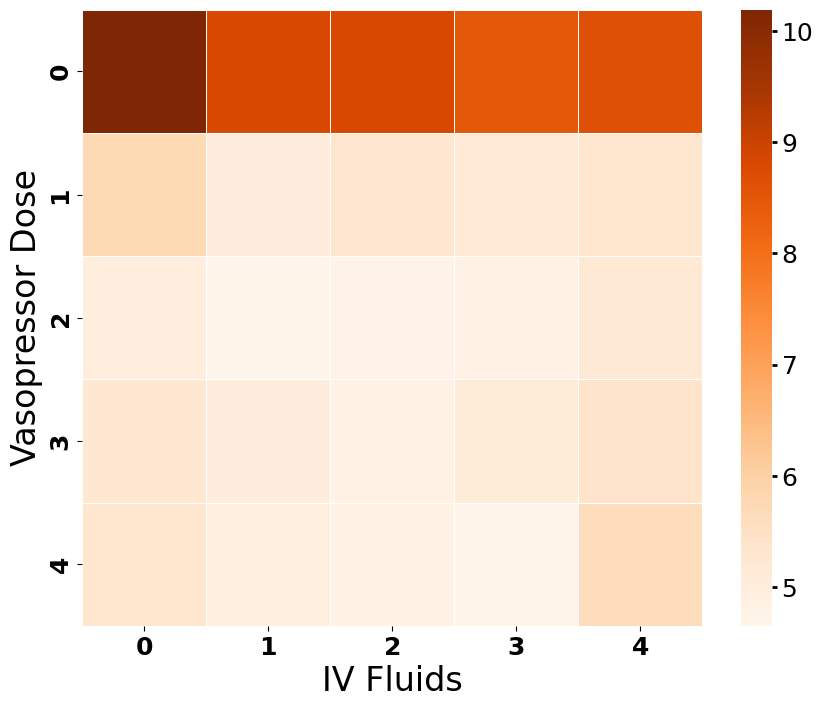

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

frequency_matrix = mimic_table['medication'].value_counts().sort_index().values.reshape(5, 5)
print(mimic_table['medication'].value_counts())
frequency_matrix = np.log(frequency_matrix)
frequency_df = pd.DataFrame(frequency_matrix)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(frequency_df, annot=False, cmap='Oranges', fmt='f', linewidths=.5)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=18, width=2) 
#ax.set_title('Heatmap of Medication Frequency', fontsize=24)
ax.set_ylabel('Vasopressor Dose', fontsize=24)
ax.set_xlabel('IV Fluids', fontsize=24)
plt.tick_params(axis='both', labelsize=18)
ax1 = plt.gca()
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontweight('bold')
plt.savefig('label_frequency.png', bbox_inches='tight')

In [47]:
#fixed length = 8
import pickle
from collections import Counter

#data.dropna(subset=['notes'], inplace=True)
print(mimic_table['icustayid'].nunique())
label_count = []
def build_variable_length_series(df, min_length=8):
    time_series_data = []
    grouped = df.groupby('icustayid')
    for _, group in grouped:
        # 假设数据已经按时间顺序排序
        if len(group) >= min_length:
            time_series_data.append(group)
    return time_series_data

time_series_data = build_variable_length_series(mimic_table)
print(len(time_series_data))
time_series_data = [ts[:8] for ts in time_series_data if len(ts) >= 8]
label_count = [ts.iloc[-1, -3] for ts in time_series_data]
print(len(Counter(label_count).keys()))

lengths = [len(series) for series in time_series_data]
length_count = pd.Series(lengths).value_counts()
print(length_count)

save_path = '../../../method/sepsis_time_series_data.csv'
with open(save_path, 'wb') as f:
    pickle.dump(time_series_data, f)



4572
3525
25
8    3525
Name: count, dtype: int64


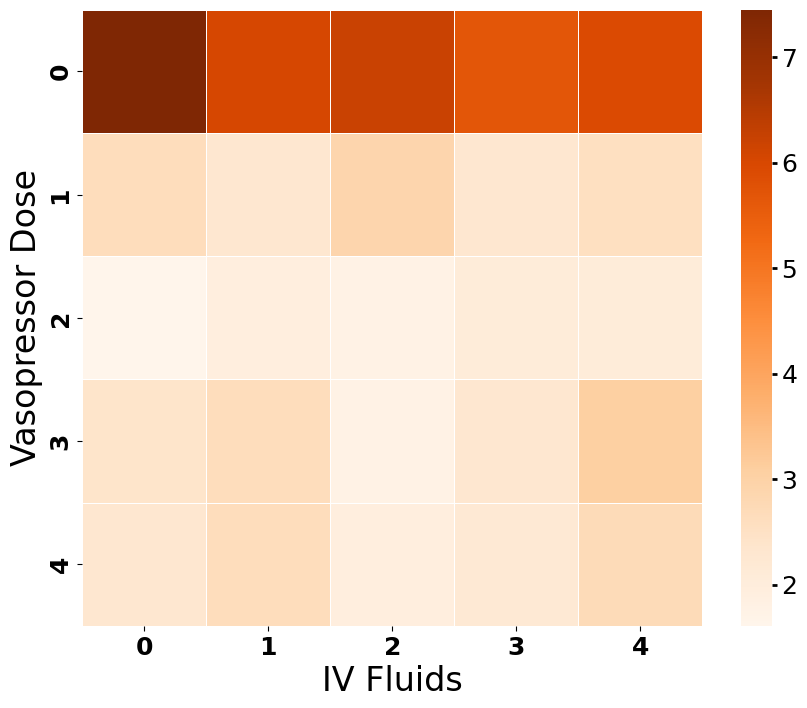

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

frequency_count = Counter(label_count)
frequency_matrix = np.array([frequency_count[label] for label in sorted(frequency_count)]).reshape(5, 5)
frequency_matrix = np.log(frequency_matrix)
frequency_df = pd.DataFrame(frequency_matrix)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(frequency_df, annot=False, cmap='Oranges', fmt='f', linewidths=.5)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=18, width=2) 
#ax.set_title('Heatmap of Medication Frequency', fontsize=24)
ax.set_ylabel('Vasopressor Dose', fontsize=24)
ax.set_xlabel('IV Fluids', fontsize=24)
plt.tick_params(axis='both', labelsize=18)
ax1 = plt.gca()
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontweight('bold')
plt.savefig('label_frequency.png', bbox_inches='tight')

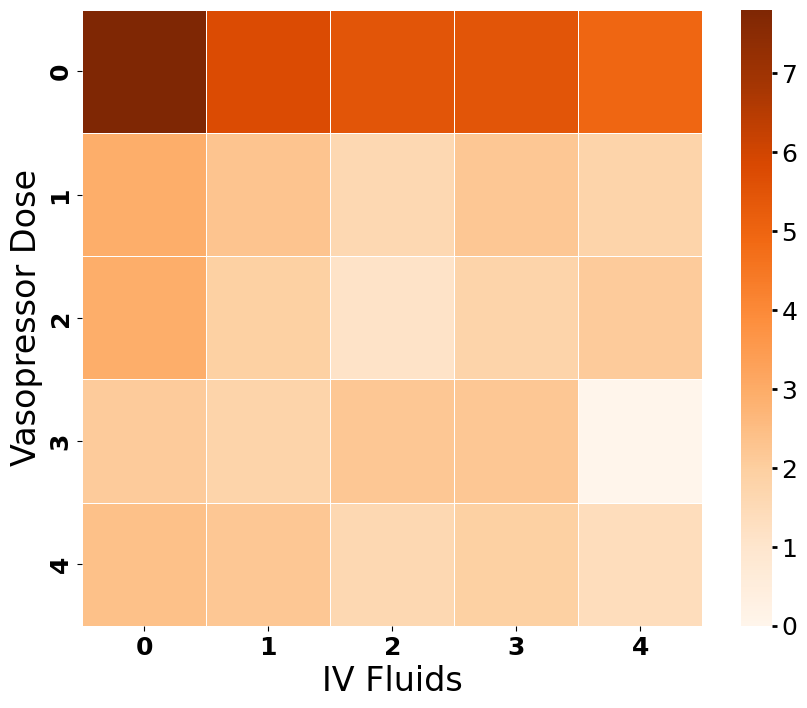

In [49]:
Survival_time_series_data = [ts for ts in time_series_data if ts.iloc[-1, -2]==0]
label_count = [ts.iloc[0, -3] for ts in time_series_data]
import seaborn as sns
import matplotlib.pyplot as plt

frequency_count = Counter(label_count)
frequency_matrix = np.array([frequency_count[label] for label in sorted(frequency_count)]).reshape(5, 5)
frequency_matrix = np.log(frequency_matrix)
frequency_df = pd.DataFrame(frequency_matrix)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(frequency_df, annot=False, cmap='Oranges', fmt='f', linewidths=.5)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=18, width=2) 
#ax.set_title('Heatmap of Medication Frequency', fontsize=24)
ax.set_ylabel('Vasopressor Dose', fontsize=24)
ax.set_xlabel('IV Fluids', fontsize=24)
plt.tick_params(axis='both', labelsize=18)
ax1 = plt.gca()
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontweight('bold')
plt.savefig('label_frequency_s.png', bbox_inches='tight')

In [ ]:
#various length, all larger than 8 but less than 15
import pickle
from collections import Counter

#data.dropna(subset=['notes'], inplace=True)
print(mimic_table['icustayid'].nunique())
label_count = []
def build_variable_length_series(df, min_length=8):
    time_series_data = []
    grouped = df.groupby('icustayid')
    for _, group in grouped:
        # 假设数据已经按时间顺序排序
        if len(group) >= min_length:
            time_series_data.append(group)
    return time_series_data

time_series_data = build_variable_length_series(mimic_table)
print(len(time_series_data))
#time_series_data = [ts[:8] for ts in time_series_data if len(ts) >= 8]
label_count = [ts.iloc[0, -3] for ts in time_series_data]
print(len(Counter(label_count).keys()))

lengths = [len(series) for series in time_series_data]
length_count = pd.Series(lengths).value_counts()
print(length_count)

save_path = '../../../method/sepsis_time_series_data.csv'
with open(save_path, 'wb') as f:
    pickle.dump(time_series_data, f)



In [3]:
import pickle
ts_path = '../../../method/sepsis_time_series_data.csv'
with open(ts_path, 'rb') as f:
    time_series_data = pickle.load(f)

In [6]:
print(len(time_series_data))
print(len(Survival_time_series_data))

TypeError: list indices must be integers or slices, not tuple

In [31]:
ts.iloc[:-1, -1]

7     [0.021507931873202324, -0.023091094568371773, ...
8     [0.021507931873202324, -0.023091094568371773, ...
9     [0.021507931873202324, -0.023091094568371773, ...
10    [0.021507931873202324, -0.023091094568371773, ...
11    [0.02150794118642807, -0.02309112809598446, 0....
12    [0.021507931873202324, -0.023091094568371773, ...
13    [0.021507931873202324, -0.023091094568371773, ...
14    [0.02150794118642807, -0.02309112809598446, 0....
15    [0.021507931873202324, -0.023091094568371773, ...
Name: embeddings, dtype: object

In [32]:
def pad_sequences(sequences, max_len=10, dtype='float32'):
    if not max_len:
        max_len = max(len(seq) for seq in sequences)
    
    padded_seqs = []
    for seq in sequences:
        pad_len = max_len - len(seq)
        if pad_len > 0:
            padded_seq = np.vstack([seq, np.zeros((pad_len, seq.shape[1]), dtype=dtype)])
        else:
            padded_seq = seq
        padded_seqs.append(padded_seq)
    
    return np.stack(padded_seqs)

test = pad_sequences([pre_meds], max_len=10)[0]
test


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [90]:
other_info = np.array(ts.iloc[:-1, -1].tolist())
test = pad_sequences([other_info], max_len=10)[0]
test

array([[-0.04713112, -0.07607616, -0.03715828, ..., -0.05597569,
         0.05643491, -0.02148155],
       [-0.04713112, -0.07607616, -0.03715828, ..., -0.05597569,
         0.05643491, -0.02148155],
       [-0.0299003 , -0.06559326, -0.01686712, ..., -0.09192805,
         0.03139991,  0.01370038],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])